# Week10 - MNIST 숫자 데이터 분류 모델 생성 / DNN - 딥러닝

202334716 이예나

---

### MNIST(Mixed National Institute of Standards and Technology)
: 머신러닝 및 딥러닝 분야에서 가장 널리 사용되는 이미지 분류 데이터셋 중 하나

- 데이터 구성: 총 70,000개의 흑백 이미지 (훈련용 60,000개, 테스트용 10,000개)
- 이미지 크기: 28 x 28 픽셀
- 분류 대상: 손으로 쓴 숫자 0부터 9까지 (총 10개 클래스)
- 라벨(label): 각 이미지에 해당하는 정답 숫자 (정수 0~9)

### DNN vs CNN

| 항목              | DNN (Deep Neural Network)        | CNN (Convolutional Neural Network)   |
| --------------- | -------------------------------- | ------------------------------------ |
| **모델 구조**       | 완전 연결층(Dense)으로 구성               | 합성곱(Conv) + 풀링(Pooling) + Dense      |
| **입력 형태**       | 1차원 벡터 (Flatten 필요)              | 2D 이미지 그대로 사용 (채널 포함)                |
| **특징 추출 방식**    | 직접 모든 픽셀을 연결해 학습                 | 필터를 통해 국소적인 특징 자동 추출                 |
| **공간 정보 활용**    | 불가능 (픽셀 간 위치 정보 손실)              | 가능 (위치/모양 등 공간 구조 유지)                |
| **계산량**         | 노드 수가 많아 계산량 큼                   | 파라미터 공유로 계산량 감소                      |
| **과적합 위험**      | 높음 (매우 많은 파라미터)                  | 낮음 (필터 공유, Pooling 사용)               |
| **적합한 데이터**     | 수치 데이터, 간단한 이미지                  | 이미지, 영상, 시각적 데이터                     |
| **성능 (이미지 분류)** | 보통 (공간정보 손실로 한계)                 | 우수 (이미지에 특화됨)                        |
| **활성화 함수**      | 주로 ReLU, Sigmoid, Tanh           | 주로 ReLU                              |
| **예시 구성**       | Dense → Dropout → Dense → Output | Conv → Pool → Conv → Flatten → Dense |

---

### MNIST 숫자 데이터셋을 불러오는 여러가지 방법

| 방법                         | 장점                          | 단점                         | 주로 사용되는 라이브러리        |
| -------------------------- | --------------------------- | -------------------------- | -------------------- |
| **TensorFlow/Keras**       | 간단하고 직관적인 방법                | 이미지 전처리가 필요할 수 있음          | TensorFlow, Keras    |
| **TensorFlow Dataset API** | 유연한 데이터 처리 가능               | 처음 설정이 다소 복잡할 수 있음         | TensorFlow           |
| **scikit-learn**           | CSV 및 DataFrame 형태로 데이터 다루기 | 2D 이미지로 변환 필요              | scikit-learn, pandas |
| **PyTorch (torchvision)**  | 바로 텐서로 변환, 배치 처리 가능         | PyTorch에 익숙하지 않으면 불편할 수 있음 | PyTorch, torchvision |
| **OpenML (Keras)**         | OpenML에서 데이터 직접 다운로드        | ARFF 파일을 읽는 데 추가 작업 필요     | Keras, scipy         |
| **Pandas (CSV)**           | 데이터프레임 형태로 데이터 쉽게 다룸        | 이미지 변환을 위한 추가 코드 필요        | pandas               |


#### +) 텐서플로, 케라스, 스킷런, 파이토치 비교

| 라이브러리    | 주요 특징                      | 장점                             | 단점                               | 주요 사용처                    |
| -------- | -------------------------- | ------------------------------ | -------------------------------- | ------------------------- |
| **텐서플로** | 구글의 오픈소스 딥러닝 프레임워크         | 대규모 데이터셋 및 분산 학습, 다양한 배포 옵션 제공 | 코드가 복잡하고, 입문이 어려울 수 있음           | 대규모 모델 학습, 상용화 환경         |
| **케라스**  | 고수준 딥러닝 API, TensorFlow 통합 | 간단하고 직관적인 API 제공, 빠른 프로토타입 가능  | TensorFlow에 의존적, 세부 설정은 어려울 수 있음 | 신속한 모델 개발, 연구용            |
| **스킷런**  | 전통적인 머신러닝 알고리즘 라이브러리       | 사용이 간편하고, 머신러닝 알고리즘이 다양함       | 딥러닝 지원 안됨, 대규모 데이터셋에 한계          | 회귀, 분류, 군집화 등 전통적 머신러닝 작업 |
| **파이토치** | 동적 계산 그래프 기반의 딥러닝 프레임워크    | 직관적인 코드 작성, 연구와 실험에 유리함        | 대규모 배포 환경에서 불편할 수 있음             | 연구, 실험, 딥러닝 연구 커뮤니티       |


---

### MNIST 데이터셋 불러오기 / 데이터 전처리

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical # 숫자 레이블을 원-핫 인코딩 벡터로 변환하는 유틸 함수

# MNIST 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data() # load_data() : 훈련용, 테스트용 구분

# 정규화 : 0~255 → 0~1
x_train = x_train / 255.0
x_test = x_test / 255.0

# 28x28 평탄화 (DNN 입력층은 1차원 벡터 형태)
x_train = x_train.reshape(-1, 28 * 28) # .reshape(샘플 수, 특성 수) -> (60000, 784)
x_test = x_test.reshape(-1, 28 * 28)   # -1 : 자동으로 개수 계산

# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
# 각 데이터셋 shape 확인
print("x_train shape :", x_train.shape)
print("y_train shape :", y_train.shape)
print("------------------------------")
print("x_test shape :", x_test.shape)
print("y_test shape :", y_test.shape)

x_train shape : (60000, 784)
y_train shape : (60000, 10)
------------------------------
x_test shape : (10000, 784)
y_test shape : (10000, 10)


x_train : 훈련 이미지

y_train : 훈련 정답 숫자

x_test : 테스트 이미지

y_test : 테스트 정답 숫자

### DNN 모델 생성

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),  # 은닉층 1
    Dropout(0.2),                                       # 과적합 방지
    Dense(256, activation='relu'),                      # 은닉층 2
    Dropout(0.2),
    Dense(10, activation='softmax')                     # 출력층 (0~9 클래스)
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(
    optimizer='adam',                  # 옵티마이저
    loss='categorical_crossentropy',   # 다중 클래스 분류
    metrics=['accuracy']               # 평가 지표
)

### 모델 훈련

In [14]:
history = model.fit(
    x_train, y_train,
    epochs=10,                # 전체 데이터셋을 10번 반복 학습
    batch_size=128,           # 128개씩 묶어서 학습
    validation_split=0.2      # 훈련 데이터 중 20%를 검증용으로 사용
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8430 - loss: 0.5224 - val_accuracy: 0.9620 - val_loss: 0.1274
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9632 - loss: 0.1249 - val_accuracy: 0.9674 - val_loss: 0.1028
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9744 - loss: 0.0843 - val_accuracy: 0.9735 - val_loss: 0.0864
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9815 - loss: 0.0586 - val_accuracy: 0.9737 - val_loss: 0.0878
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9831 - loss: 0.0524 - val_accuracy: 0.9768 - val_loss: 0.0808
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9870 - loss: 0.0404 - val_accuracy: 0.9778 - val_loss: 0.0790
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9901 - loss: 0.0305 - val_accuracy: 0.9786 - val_loss: 0.0829
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9902 - loss: 0.0304 - val_accuracy: 0.

### 예측 및 평가

In [20]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)  # 예측 클래스

y_test_class = np.argmax(y_test, axis=1)

print("report : \n", classification_report(y_test_class, y_pred_class))
print("=============================================")
print("confusion matrix : \n", confusion_matrix(y_test_class, y_pred_class))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

confusion matrix : 
 [[ 972    1    0    2    0    1    2    0    1    1]
 [   0 1124    4    0    0    2    2    1    2    0]
 [   0    0 1012    4    2    0    2    5    7    0]
 [   1 

**Precision** : 예측한 것 중에 맞은 비율 (정밀도)      

**Recall**    : 실제 정답 중에서 모델이 맞춘 비율 (재현율) 

**F1-score**  : 정밀도와 재현율의 조화 평균             

**Support**   : 각 클래스(0\~9)의 실제 데이터 개수      


### 정확도 시각화

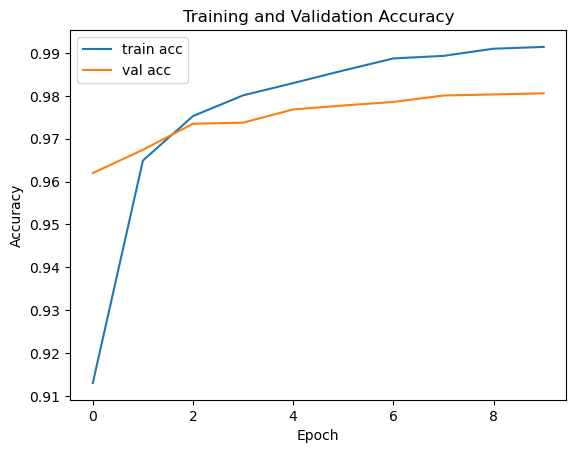

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 테스트 데이터 시각화 & 예측 결과

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step


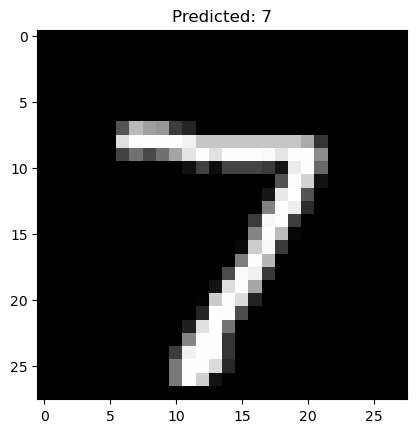

In [37]:
import numpy as np

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1) # 각 이미지마다 가장 확률이 높은 인덱스 추출 (예측한 숫자)

# 예측 확인
import matplotlib.pyplot as plt

plt.imshow(x_test[0].reshape(28,28), cmap='gray') # x_test[0] : 테스트셋의 첫 번째 이미지를 시각화
                                                  # .reshape(28,28) : 시각화를 위한 2차원 이미지(28×28 픽셀) 변환

plt.title(f"Predicted: {predicted_labels[0]}") # 모델이 예측한 숫자 출력
plt.show()

### 모델이 정확하게 예측한 이미지 (0~9)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step


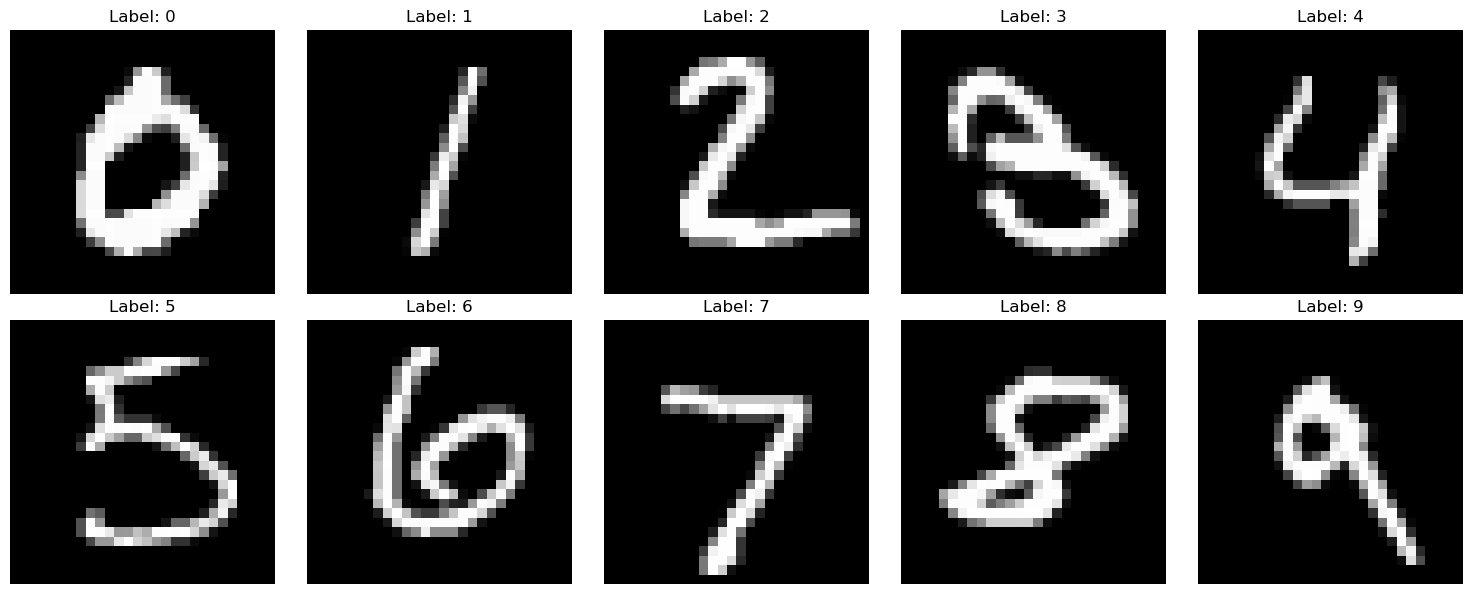

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# 모델 예측
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)  # 실제 정답 레이블

# 0부터 9까지 정확히 맞춘 이미지 인덱스를 저장할 딕셔너리
correct_indices = {}

# 전체 테스트셋에서 각 숫자에 대해 정확히 맞춘 첫 번째 인덱스를 수집
for i in range(len(x_test)):
    true = true_labels[i]
    pred = predicted_labels[i]

    if true == pred and true not in correct_indices:
        correct_indices[true] = i
        if len(correct_indices) == 10:
            break

# 시각화
plt.figure(figsize=(15, 6))
for idx, digit in enumerate(range(10)):
    i = correct_indices[digit]
    plt.subplot(2, 5, idx + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {digit}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### 모델이 틀리게 예측한 이미지 (0~9)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step


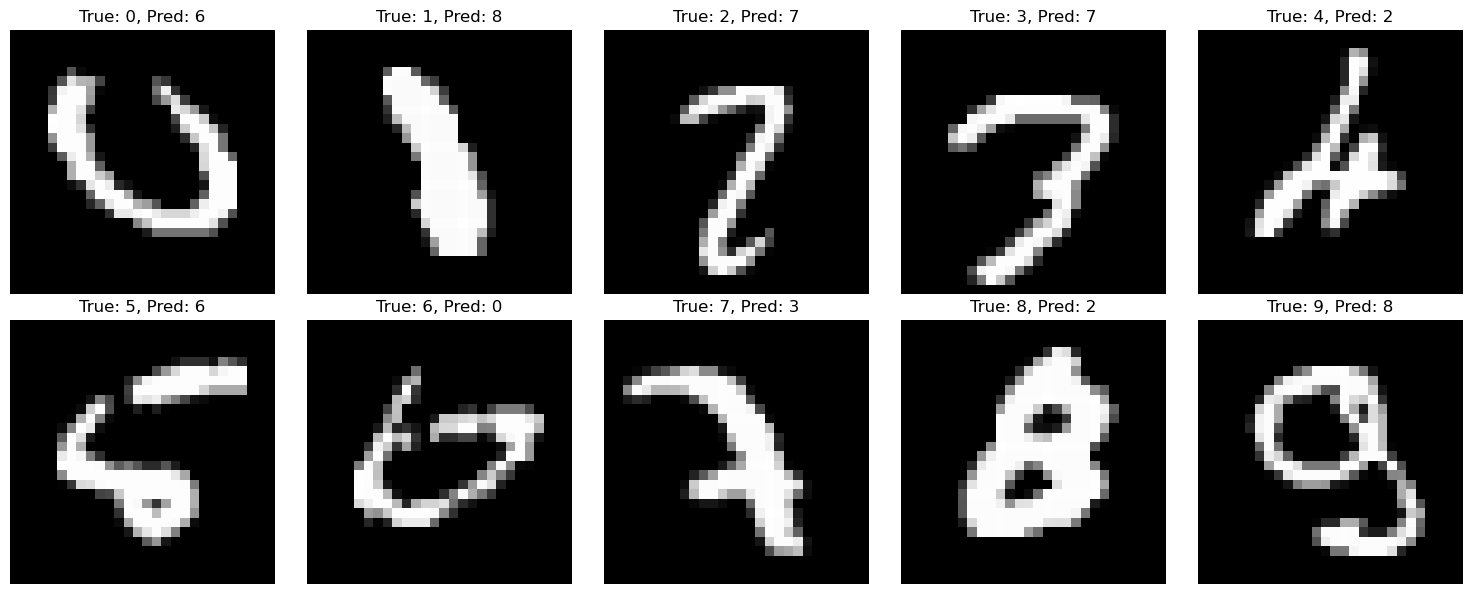

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# 예측값 및 실제값
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# 0~9까지 틀린 예측 중 하나씩 저장할 딕셔너리
wrong_indices = {}

# 틀린 예측 중에서 각 숫자당 하나씩만 선택
for i in range(len(x_test)):
    true = true_labels[i]
    pred = predicted_labels[i]
    
    if true != pred:
        if true not in wrong_indices:
            wrong_indices[true] = i
        if len(wrong_indices) == 10:
            break

# 시각화
plt.figure(figsize=(15, 6))
for idx, digit in enumerate(range(10)):
    i = wrong_indices[digit]
    plt.subplot(2, 5, idx + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()